In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
%matplotlib inline

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.drop('id', axis=1, inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
missing_values = df.isna().sum().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [7]:
dup_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {dup_rows}")
df.drop_duplicates(inplace=True)

Number of duplicated rows: 24


In [8]:
df['age'] = (df['age'] / 365.25).round(1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0


### Gender

The `gender` column is a categorical variable encoded with the values 1 and 2. However, the dataset does not specify which value corresponds to male or female.

To determine the correct mapping, we will compare the mean height and weight for each group. Since males are typically taller and heavier than females on average, we can infer the gender codes based on these differences.

In [9]:
df.groupby('gender')['height'].mean()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64

In [10]:
df.groupby('gender')['weight'].mean()

gender
1    72.568898
2    77.258238
Name: weight, dtype: float64

Based on the analysis, value 1 corresponds to females and value 2 corresponds to males. This conclusion is supported by the observation that the group labeled with 2 has a higher average height and weight, which aligns with general population trends.

### Box Plot of Height and Weight

We shall visualize the distribution of height and weight to identify potential outliers. Outliers are displayed as individual points outside the whiskers of each box.

By examining these distributions, we can assess the range and presence of extreme values. This will inform the selection of appropriate thresholds or statistical methods for outlier removal in the next step.

In [11]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df['height'],
    name = 'Height',
    boxpoints='outliers',
    marker_color='black'
))

fig.add_trace(go.Box(
    x=df['weight'],
    name = 'Weight',
    boxpoints='outliers',
    marker_color='gray'
))

fig.update_layout(
    title_text="Box Plot of Height and Weight with Outliers",
)

fig.show()

### Outlier Impact Assessment Using IQR

We shall examine how many data points will be excluded if we apply the standard Interquartile Range (IQR) method for detecting outliers.

This step calculates the IQR for both height and weight, identifies the corresponding lower and upper bounds, and determines the number of rows that fall outside these thresholds. The result provides an estimate of the data loss percentage if standard IQR filtering is applied.

In [12]:
iqr_multiplier = 1.5

before = len(df)

q1_h = df['height'].quantile(0.25)
q3_h = df['height'].quantile(0.75)
iqr_h = q3_h - q1_h
lower_h = q1_h - iqr_multiplier * iqr_h
upper_h = q3_h + iqr_multiplier * iqr_h

q1_w = df['weight'].quantile(0.25)
q3_w = df['weight'].quantile(0.75)
iqr_w = q3_w - q1_w
lower_w = q1_w - iqr_multiplier * iqr_w
upper_w = q3_w + iqr_multiplier * iqr_w

outliers_h = df[(df['height'] < lower_h) | (df['height'] > upper_h)]
outliers_w = df[(df['weight'] < lower_w) | (df['weight'] > upper_w)]
all_outliers = pd.concat([outliers_h, outliers_w]).drop_duplicates()

iqr_removed = len(all_outliers)
total = len(df)
pct_outliers = (iqr_removed / total) * 100

print(f"Outliers outside IQR: {iqr_removed} rows")
print(f"Percentage of dataset: {pct_outliers:.2f}%")

Outliers outside IQR: 2277 rows
Percentage of dataset: 3.25%


### Refining the IQR Threshold for Outlier Removal

The initial IQR-based filtering resulted in the removal of 3.25% of the dataset, which is considered too high. To reduce unnecessary data loss, we shall increase the IQR multiplier to 2.5, making the outlier detection less aggressive.

With the new threshold, we recalculate the lower and upper bounds for both height and weight, and filter the dataset accordingly. We also compute the number and percentage of rows removed under the revised condition.

In [13]:
iqr_multiplier = 2.5

before = len(df)

q1_h = df['height'].quantile(0.25)
q3_h = df['height'].quantile(0.75)
iqr_h = q3_h - q1_h
lower_h = q1_h - iqr_multiplier * iqr_h
upper_h = q3_h + iqr_multiplier * iqr_h

q1_w = df['weight'].quantile(0.25)
q3_w = df['weight'].quantile(0.75)
iqr_w = q3_w - q1_w
lower_w = q1_w - iqr_multiplier * iqr_w
upper_w = q3_w + iqr_multiplier * iqr_w

df = df[
    (df['height'] >= lower_h) & (df['height'] <= upper_h) &
    (df['weight'] >= lower_w) & (df['weight'] <= upper_w)
]

after = len(df)
iqr_removed = before - after
pct_removed = (iqr_removed / before) * 100

print(f"Number of rows removed: {iqr_removed}")
print(f"Percentage of dataset: {pct_removed:.2f}%")

Number of rows removed: 501
Percentage of dataset: 0.72%


### Systolic and Diastolic Blood Pressure Thresholds

This section outlines the physiological limits used to clean blood pressure data based on clinical guidelines and published research.

According to the [American Heart Association (AHA)](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings?utm_source=chatgpt.com), normal blood pressure is defined as:

- Systolic pressure < 120 mmHg  
- Diastolic pressure < 80 mmHg

In addition, the study titled "[Developing and Validating a Diagnostic Threshold for Central Blood Pressure in Assessing Cardiovascular Risks](https://academic.oup.com/eurjpc/advance-article/doi/10.1093/eurjpc/zwaf309/8142405)" recommended excluding the following extreme values:

- Central systolic pressure < 70 mmHg or ≥ 230 mmHg  
- Central diastolic pressure < 40 mmHg or ≥ 150 mmHg

Any record where the systolic pressure is lower than the diastolic pressure is also considered physiologically invalid and excluded, as this contradicts basic cardiovascular physiology.

In [14]:
before = len(df)

df = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] < 230) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] < 150) &
    (df['ap_hi'] >= df['ap_lo'])
]

after = len(df)
bp_removed = before - after
pct_removed = (bp_removed / before) * 100

print(f"Number of rows removed: {bp_removed}")
print(f"Percentage of dataset: {pct_removed:.2f}%")

Number of rows removed: 1317
Percentage of dataset: 1.90%


### Summary of Data Points Removed During Preprocessing

To maintain data quality and ensure the integrity of subsequent analysis, we applied several preprocessing steps. The table below summarizes the number of data points removed at each stage, including missing values, duplicate rows, IQR-based outliers, and entries that violated physiological limits for blood pressure.

In [15]:
removed_data = {
    'Preprocessing Step': ['Missing Values', 'Duplicated rows', 'IQR Outliers', 'BP Physiological Limits'],
    'Datapoints Removed': [missing_values, dup_rows, iqr_removed, bp_removed]
}

removed_df = pd.DataFrame(removed_data)
print(removed_df)

        Preprocessing Step  Datapoints Removed
0           Missing Values                   0
1          Duplicated rows                  24
2             IQR Outliers                 501
3  BP Physiological Limits                1317


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68158 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68158 non-null  float64
 1   gender       68158 non-null  int64  
 2   height       68158 non-null  int64  
 3   weight       68158 non-null  float64
 4   ap_hi        68158 non-null  int64  
 5   ap_lo        68158 non-null  int64  
 6   cholesterol  68158 non-null  int64  
 7   gluc         68158 non-null  int64  
 8   smoke        68158 non-null  int64  
 9   alco         68158 non-null  int64  
 10  active       68158 non-null  int64  
 11  cardio       68158 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.8 MB


### BMI (Body Mass Index)

According to [HealthHub Singapore](https://www.healthhub.sg/live-healthy/weight_putting_me_at_risk_of_health_problems), Body Mass Index (BMI) is a screening tool used to classify individuals into weight categories associated with varying health risks. While BMI does not directly measure body fat or overall health, it serves as a useful indicator for monitoring health status in population-level studies.

BMI is calculated using the following formula:

$$
BMI = \frac{\text{weight (kg)}}{[\text{height (m)}]^2}
$$

As referenced from the [Singapore Heart Foundation](https://www.myheart.org.sg/tools-resources/bmi-calculator/), BMI categories are defined as follows:

| BMI Range   | Category   | Risk of Health Problems  |
| ----------- | ---------- | ------------------------ |
| ≥ 27.5      | Obese      | High risk                |
| 23.0 – 27.4 | Overweight | Moderate risk            |
| 18.5 – 22.9 | Normal     | Low risk (healthy range) |

Individuals with a BMI of 23 or higher are considered to be in the overweight or obese range and face increased risk of developing chronic conditions such as type 2 diabetes, hypertension, cardiovascular disease, and musculoskeletal disorders.

We shall include a new column in the dataset to calculate and store each individual's BMI to support further analysis on health risk stratification.

In [17]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
df['bmi'] = df['bmi'].round(2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.01


### BMI Classification

To enable categorical analysis of `BMI`, we shall classify each individual's BMI into grouped categories based on established clinical thresholds.

The table below outlines the classification scheme, assigning a group number to each BMI range. These categories provide a more granular view of weight-related health risk levels, from underweight to various classes of obesity.

| Group Number | BMI Range     | Category        |
|--------------|---------------|-----------------|
| 0            | < 18.5        | Underweight     |
| 1            | 18.5 – 22.9   | Normal          |
| 2            | 23.0 – 24.9   | Overweight      |
| 3            | 25.0 – 27.4   | Obese Class 1   |
| 4            | 27.5 – 29.9   | Obese Class 2   |
| 5            | ≥ 30.0        | Obese Class 3   |

This classification will be added as a new column in the dataset (`bmi_grp`).

In [18]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 0
    elif 18.5 <= bmi <= 22.9:
        return 1
    elif 23.0 <= bmi <= 24.9:
        return 2
    elif 25.0 <= bmi <= 27.4:
        return 3
    elif 27.5 <= bmi <= 29.9:
        return 4
    else:
        return 5

df['bmi_grp'] = df['bmi'].apply(classify_bmi)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_grp
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.93,5
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.51,2
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.71,4
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.01,2


### Mean Arterial Pressure (MAP)

We shall calculate the Mean Arterial Pressure (MAP) for each individual using the following formula:

$$
\text{MAP} = \frac{2 \times \text{Diastolic BP} + \text{Systolic BP}}{3}
$$

MAP provides an estimate of the average pressure in a person’s arteries during one cardiac cycle. It is influenced by cardiac output and total peripheral resistance (TPR), and is often used as an indicator of overall blood flow and organ perfusion.

The calculated MAP values will be stored in a new column (`map`), rounded to two decimal places for consistency.

In [19]:
df['map'] = ((2 * df['ap_lo']) + df['ap_hi']) / 3
df['map'] = df['map'].round(2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_grp,map
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1,90.00
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.93,5,106.67
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.51,2,90.00
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.71,4,116.67
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.01,2,73.33


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68158 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68158 non-null  float64
 1   gender       68158 non-null  int64  
 2   height       68158 non-null  int64  
 3   weight       68158 non-null  float64
 4   ap_hi        68158 non-null  int64  
 5   ap_lo        68158 non-null  int64  
 6   cholesterol  68158 non-null  int64  
 7   gluc         68158 non-null  int64  
 8   smoke        68158 non-null  int64  
 9   alco         68158 non-null  int64  
 10  active       68158 non-null  int64  
 11  cardio       68158 non-null  int64  
 12  bmi          68158 non-null  float64
 13  bmi_grp      68158 non-null  int64  
 14  map          68158 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 8.3 MB


### Splitting Continuous and Categorical Features

To support structured analysis and visualization, we shall separate the dataset into two groups of variables: continuous and categorical.

- Continuous features include numerical variables that represent measurable quantities, such as age, height, weight, blood pressure readings, BMI, and mean arterial pressure.
- Categorical features include variables with discrete values representing categories, such as gender, lifestyle indicators, and BMI classification.

This separation allows for more appropriate handling of each variable type during exploratory analysis and model development.

In [21]:
continuous = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'map', 'cardio']
categorical = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_grp', 'cardio']

df_continuous = df[continuous]
df_categorical = df[categorical]

In [22]:
df_continuous.head()

,age,height,weight,ap_hi,ap_lo,bmi,map,cardio
0,50.4,168,62.0,110,80,21.97,90.00,0
1,55.4,156,85.0,140,90,34.93,106.67,1
2,51.6,165,64.0,130,70,23.51,90.00,1
3,48.2,169,82.0,150,100,28.71,116.67,1
4,47.8,156,56.0,100,60,23.01,73.33,0


In [23]:
df_categorical.head()

,gender,cholesterol,gluc,smoke,alco,active,bmi_grp,cardio
0,2,1,1,0,0,1,1,0
1,1,3,1,0,0,1,5,1
2,1,3,1,0,0,0,2,1
3,2,1,1,0,0,1,4,1
4,1,1,1,0,0,0,2,0


### Correlation Matrix of Continuous Variables

We shall compute the Pearson correlation coefficients between all continuous variables to examine the strength and direction of linear relationships.

The resulting heatmap displays pairwise correlation values ranging from -1 to 1:
- Values close to 1 indicate a strong positive correlation.
- Values close to -1 indicate a strong negative correlation.
- Values near 0 suggest little to no linear correlation.

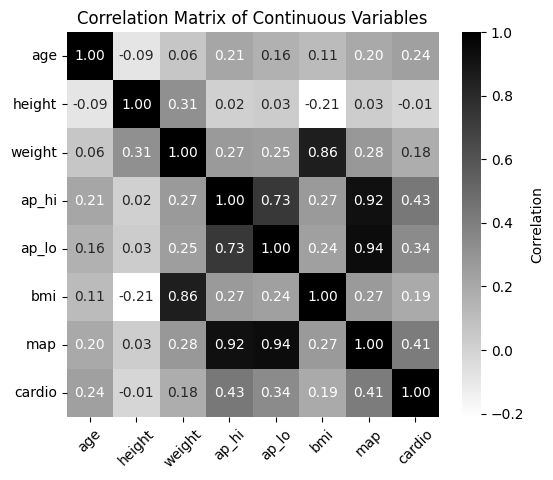

In [24]:
corr_matrix = df_continuous.corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='binary',
    fmt=".2f",
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Matrix of Continuous Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Proportion of Cardio by Categorical Feature

We shall examine the relationship between each categorical feature and the target variable `cardio` by plotting the average proportion of positive cases (`cardio = 1`) for each category level.

This allows us to observe how the likelihood of cardiovascular disease varies across different groups, such as gender, cholesterol level, glucose level, smoking status, alcohol consumption, physical activity, and BMI classification.

The vertical axis represents the proportion of individuals diagnosed with cardiovascular disease, while the horizontal axis corresponds to each category level within the feature.

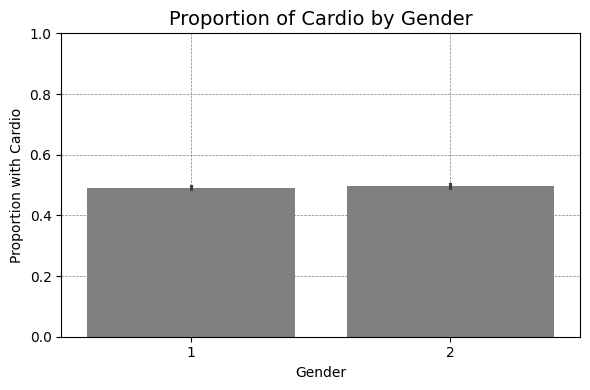

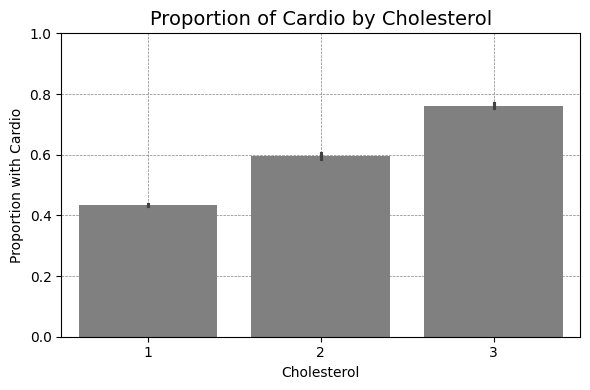

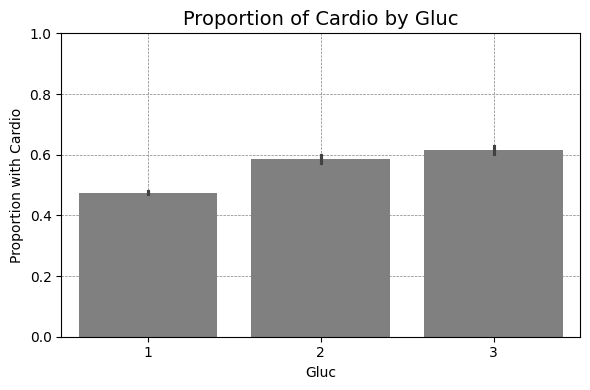

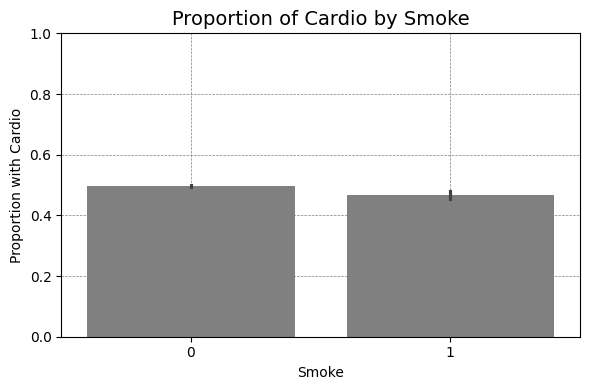

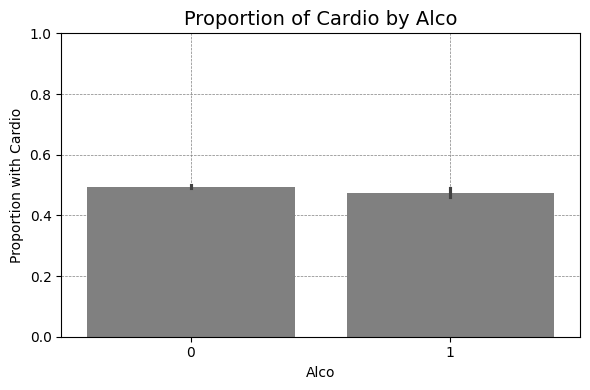

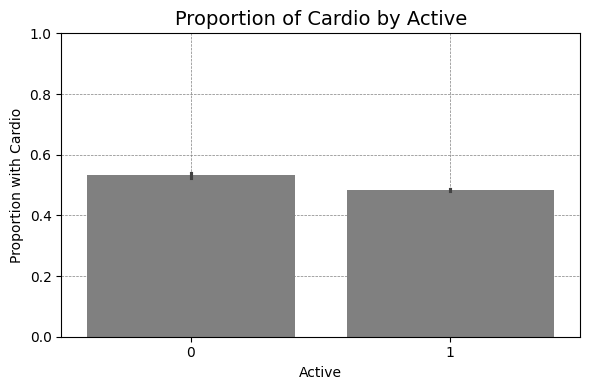

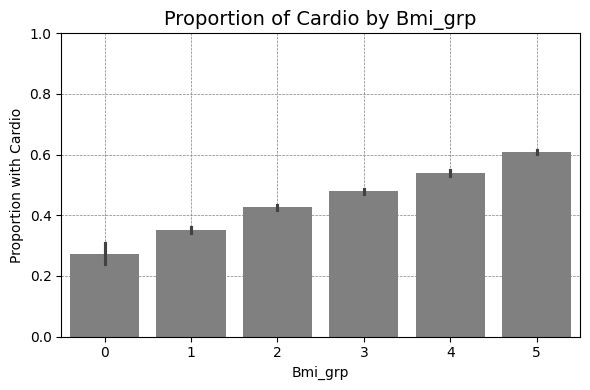

In [25]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_grp']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='cardio', data=df, color='gray')
    plt.title(f'Proportion of Cardio by {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Proportion with Cardio')
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.show()

### Train-Test Split (70/30)

To prepare the dataset for model development, we shall split it into training and testing sets using a 70/30 ratio.

This split allows the model to learn from a majority portion of the data while reserving a separate subset for evaluating its performance on unseen examples. It ensures that the evaluation reflects how the model is likely to perform in real-world scenarios.

In [26]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_grp,map
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1,90.00
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.93,5,106.67
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.51,2,90.00
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.71,4,116.67
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.01,2,73.33


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [29]:
train_df, test_df = train_test_split(
    df, 
    test_size=0.3, 
    random_state=42, 
    stratify=df['cardio']
)

print(f"Training set: {train_df.shape[0]} rows")
print(f"Test set: {test_df.shape[0]} rows")

Training set: 47710 rows
Test set: 20448 rows


### Logistic Regression

Accuracy: 0.7070
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72     10356
           1       0.72      0.66      0.69     10092

    accuracy                           0.71     20448
   macro avg       0.71      0.71      0.71     20448
weighted avg       0.71      0.71      0.71     20448



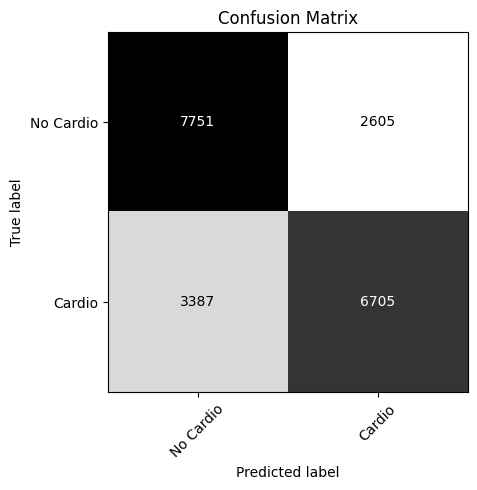

In [35]:
features = ['age', 'bmi', 'map']

X_train = train_df[features]
y_train = train_df['cardio']

X_test = test_df[features]
y_test = test_df['cardio']

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Accuracy: 0.7153
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.73     10356
           1       0.74      0.65      0.69     10092

    accuracy                           0.72     20448
   macro avg       0.72      0.71      0.71     20448
weighted avg       0.72      0.72      0.71     20448



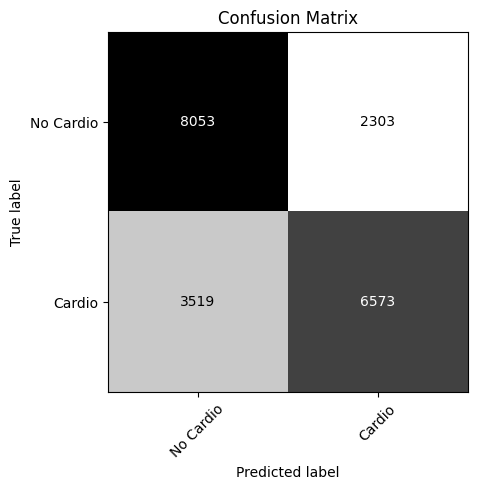

In [40]:
features = ['age', 'ap_hi', 'ap_lo', 'bmi']

X_train = train_df[features]
y_train = train_df['cardio']

X_test = test_df[features]
y_test = test_df['cardio']

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Accuracy: 0.7155
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10356
           1       0.74      0.66      0.69     10092

    accuracy                           0.72     20448
   macro avg       0.72      0.71      0.71     20448
weighted avg       0.72      0.72      0.71     20448



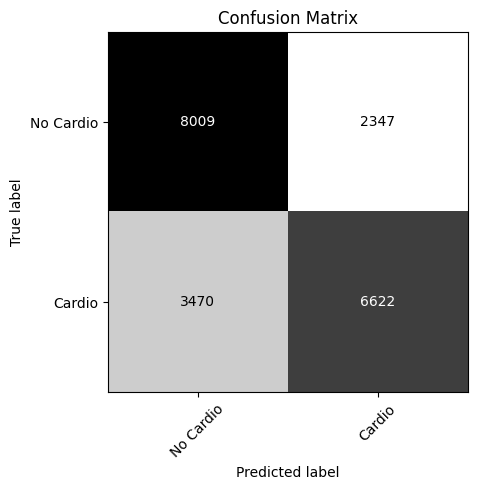

In [45]:
features = ['age', 'ap_hi', 'ap_lo', 'bmi']

X_train = train_df[features]
y_train = train_df['cardio']
X_test = test_df[features]
y_test = test_df['cardio']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000],
    'fit_intercept': [True, False],
    'tol': [1e-4, 1e-5]
}

grid = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Random Forest Classifier

Accuracy: 0.6707
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     10356
           1       0.67      0.66      0.66     10092

    accuracy                           0.67     20448
   macro avg       0.67      0.67      0.67     20448
weighted avg       0.67      0.67      0.67     20448



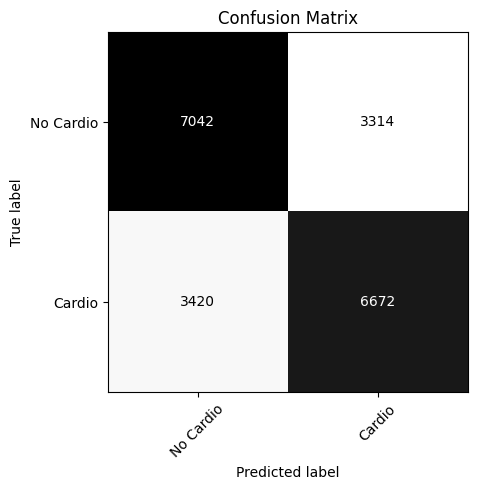

In [48]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7186
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73     10356
           1       0.73      0.68      0.70     10092

    accuracy                           0.72     20448
   macro avg       0.72      0.72      0.72     20448
weighted avg       0.72      0.72      0.72     20448



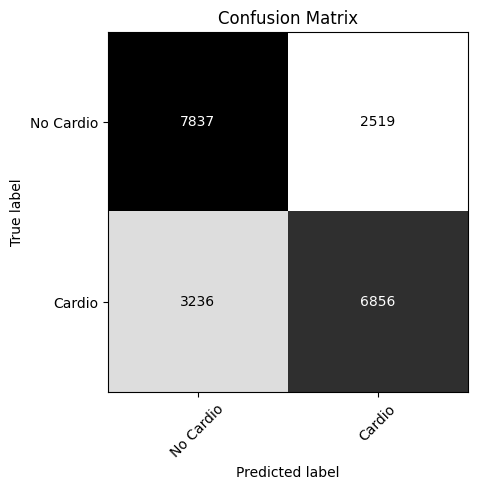

In [50]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Decision Tree Classifier

Accuracy: 0.6093
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64     10356
           1       0.62      0.54      0.58     10092

    accuracy                           0.61     20448
   macro avg       0.61      0.61      0.61     20448
weighted avg       0.61      0.61      0.61     20448



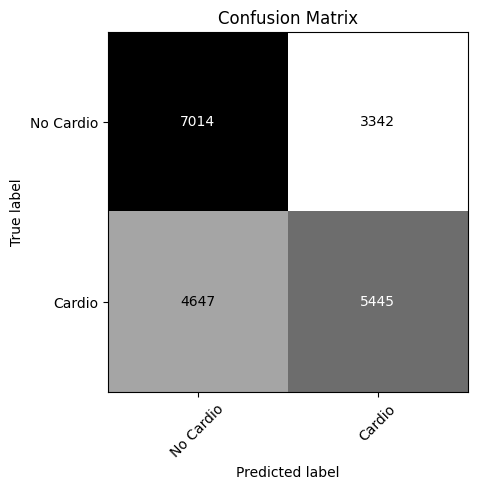

In [53]:
features = ['cholesterol', 'gluc', 'bmi_grp']

X_train = train_df[features]
y_train = train_df['cardio']
X_test = test_df[features]
y_test = test_df['cardio']

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6097
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.64     10356
           1       0.62      0.55      0.58     10092

    accuracy                           0.61     20448
   macro avg       0.61      0.61      0.61     20448
weighted avg       0.61      0.61      0.61     20448



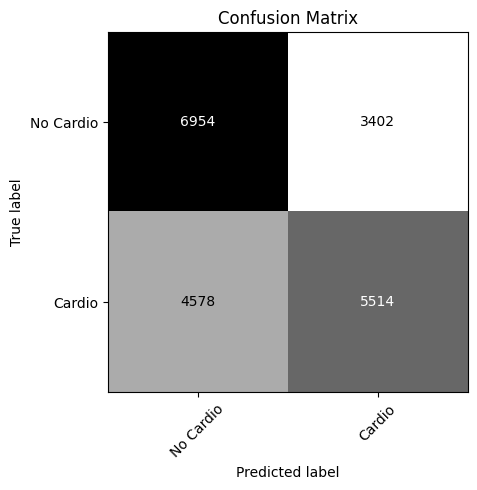

In [54]:
features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_grp']

X_train = train_df[features]
y_train = train_df['cardio']
X_test = test_df[features]
y_test = test_df['cardio']

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Naive Bayes (CategoricalNB)

Accuracy: 0.6105
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     10356
           1       0.62      0.56      0.59     10092

    accuracy                           0.61     20448
   macro avg       0.61      0.61      0.61     20448
weighted avg       0.61      0.61      0.61     20448



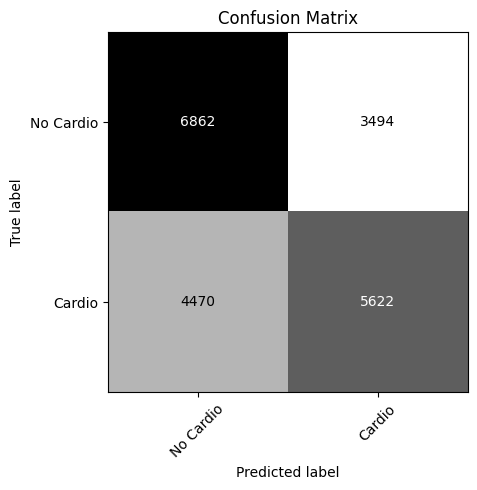

In [56]:
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Best alpha: 1.0
Accuracy: 0.6105
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     10356
           1       0.62      0.56      0.59     10092

    accuracy                           0.61     20448
   macro avg       0.61      0.61      0.61     20448
weighted avg       0.61      0.61      0.61     20448



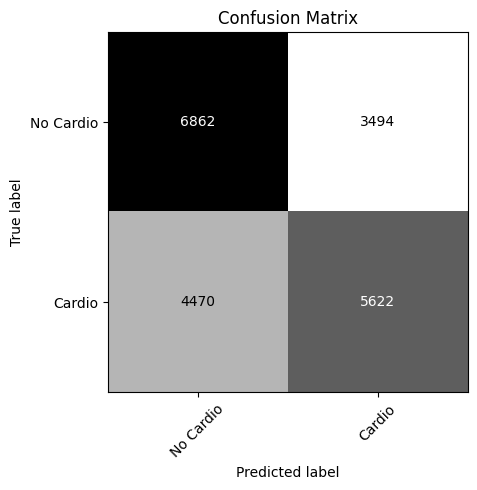

In [57]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0]
}

grid = GridSearchCV(
    CategoricalNB(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best alpha:", grid.best_params_['alpha'])
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### CatBoost Classifier

0:	learn: 0.7275414	test: 0.7220266	best: 0.7220266 (0)	total: 14.6ms	remaining: 14.6s
100:	learn: 0.7376441	test: 0.7316119	best: 0.7318075 (96)	total: 1.03s	remaining: 9.14s
200:	learn: 0.7385873	test: 0.7325900	best: 0.7325900 (191)	total: 2.03s	remaining: 8.09s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7332746479
bestIteration = 246

Shrink model to first 247 iterations.
Accuracy: 0.7333
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10356
           1       0.75      0.69      0.72     10092

    accuracy                           0.73     20448
   macro avg       0.73      0.73      0.73     20448
weighted avg       0.73      0.73      0.73     20448



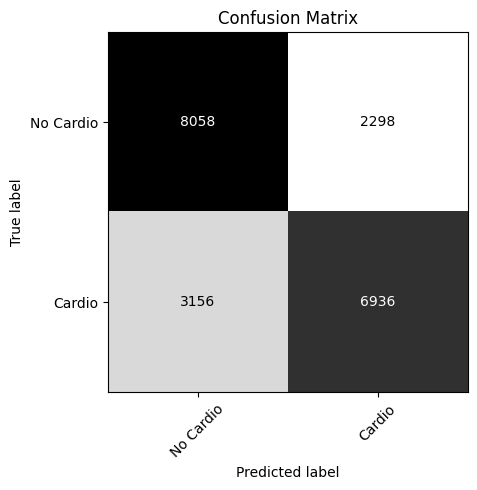

In [70]:
features = ['age', 'ap_hi', 'ap_lo', 'bmi', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_grp']

X_train = train_df[features]
y_train = train_df['cardio']
X_test = test_df[features]
y_test = test_df['cardio']

cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_grp']

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    cat_features=cat_features,
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 70, 'weights': 'uniform'}
Accuracy: 0.7267
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     10356
           1       0.75      0.67      0.71     10092

    accuracy                           0.73     20448
   macro avg       0.73      0.73      0.73     20448
weighted avg       0.73      0.73      0.73     20448



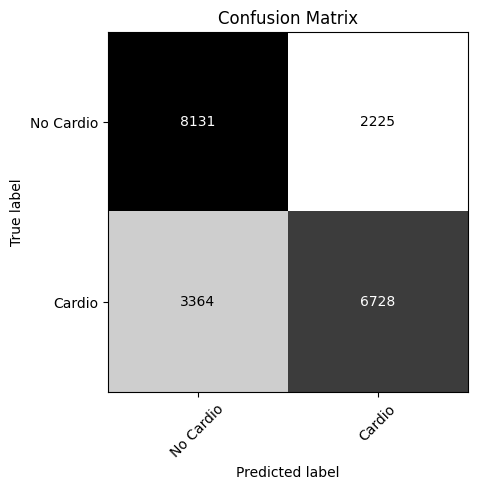

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [60, 70, 80, 90, 100, 110],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Multi-layer Perceptron (MLP) Classifier

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}
Accuracy: 0.7308
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.74     10356
           1       0.75      0.68      0.72     10092

    accuracy                           0.73     20448
   macro avg       0.73      0.73      0.73     20448
weighted avg       0.73      0.73      0.73     20448



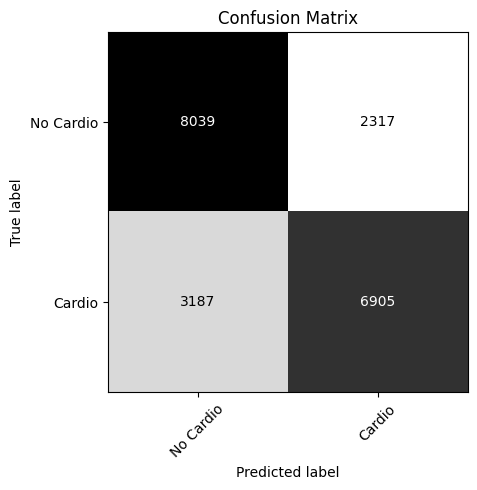

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cardio', 'Cardio'])
disp.plot(ax=ax, cmap='binary', colorbar=False)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Model Comparison: CatBoost vs MLP (Cardiovascular Disease Prediction)

### Objective
The goal of this comparison is to select the most suitable model for predicting cardiovascular disease. Special attention is given to minimizing **false negatives** — cases where the model incorrectly predicts "No Cardio" for patients who actually have cardiovascular risk. This is important in a healthcare setting to avoid missed diagnoses and ensure that at-risk patients receive further clinical evaluation.

### Background

Among all the classification models tested in this project, **CatBoost** and **MLP (Multi-Layer Perceptron)** achieved the highest overall accuracy. Therefore, we perform a detailed comparison between these two models.

### Summary of Results

| Metric                         | CatBoost (Model 1) | MLP (Model 2) |
|-------------------------------|--------------------|---------------|
| **Accuracy**                  | **0.7333**         | 0.7308        |
| True Negatives (TN)           | 8058               | 8039          |
| False Positives (FP)          | 2298               | 2317          |
| False Negatives (FN)          | **3156**           | 3187          |
| True Positives (TP)           | **6936**           | 6905          |
| Recall (Cardio = 1)           | **0.6871**         | 0.6841        |

### Key Insights

- **False Negatives (FN):**  
  CatBoost results in fewer false negatives than MLP (3156 vs 3187), which is crucial in medical predictions where missing a real cardiovascular case must be avoided.

- **True Positives (TP):**  
  CatBoost correctly identifies more actual cases of cardiovascular disease (6936 vs 6905).

- **Recall for Cardio Class:**  
  CatBoost achieves a slightly higher recall for the cardio class (0.6871), showing better ability to detect patients at risk.

### Conclusion

Both **CatBoost** and **MLP** delivered the highest overall accuracy among all models tested. However, considering the importance of correctly identifying individuals with cardiovascular disease, **CatBoost is the better-performing model**. It reduces false negatives more effectively, making it the more reliable choice for early risk detection in a healthcare setting.
